In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Expoloration des données

Description des données

In [2]:
# Charger la base de données
data = pd.read_csv('segmentation data.csv')
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
data.shape

(2000, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [7]:
data.duplicated().sum()

0

<Axes: >

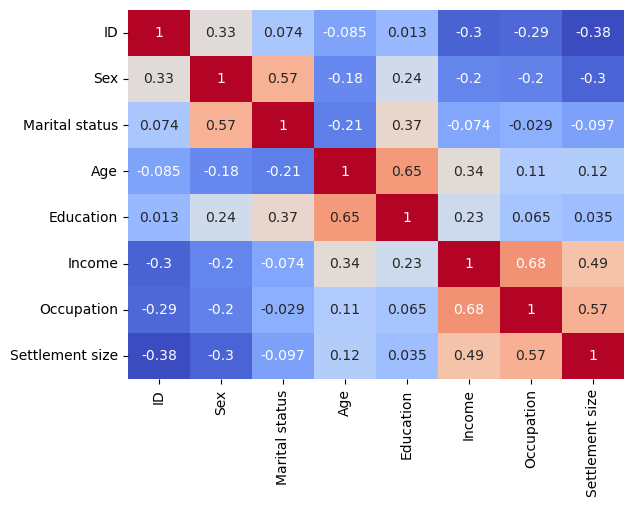

In [8]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', cbar= False)

Nous constatons qu'il y a:
- Une corrélation de 0.57 indiquant une relation modérément positive entre le statut matrimoniale (Marital status) et le sexe de la personne (Sex). Ce qui pourrait indiquer que certaines catégories de sexe (homme ou femme) ont plus de chances d'avoir un statut matrimonial spécifique (Ex: les femmes peuvent être plus souvent mariées que les hommes ou vice-versa).
- Une corrélation de 0.65 indiquant une relation modérément positive entre l'âge (Age) et le niveau d'éducation de la personne (Education). Cela peut s'expliquer par le fait que les personnes plus âgées ont eu plus de temps pour poursuivre leurs études car plus l'âge augmente, plus le niveau d'éducation tend également à être élevé.
- Une corrélation de 0.68 indiquant une relation modérément positive entre le revenu (Income) et le travail de la personne (Occupation). Ce qui signifie que la nature du travail a un impact direct sur le niveau de revenu. Cela est logique, car certaines professions sont mieux rémunérées que d'autres.
- Une corrélation de 0.49 indiquant une relation modérément positive entre le revenu (Income) et la taille de l'agglomération de la personne (Settlement size). Cela peut être lié aux opportunités économiques plus nombreuses dans les grandes villes.
- Une corrélation de 0.57 indiquant une relation modérément positive entre le travail de la personne (Occupation) et la taille de l'agglomération de la personne (Settlement size). Ce qui signifie que certains types d'emplois sont plus fréquents dans les grandes villes que dans les petites agglomérations. Par exemple, les emplois bien rémunérés ou spécialisés pourraient être plus concentrés dans les grandes zones urbaines.

Les résultats suggèrent que l'éducation, l'emploi et le revenu sont liés entre eux et influencés par des facteurs démographiques comme l'âge et la taille de l'agglomération. Les personnes vivant dans de grandes villes ont plus d'opportunités professionnelles et un revenu potentiellement plus élevé. De même, l'éducation tend à augmenter avec l'âge, ce qui peut également influencer le type d'emploi et le revenu.

*****

We find that there is:
- A correlation of 0.57 indicating a moderately positive relationship between marital status and sex. This could indicate that certain gender categories (male or female) are more likely to have a specific marital status (e.g. women may be more often married than men, or vice versa).
- A correlation of 0.65 indicating a moderately positive relationship between age (Age) and a person's level of education (Education). This may be explained by the fact that older people have had more time to pursue their education, since as age increases, so does the level of education.
- A correlation of 0.68 indicating a moderately positive relationship between Income and Occupation. This means that the nature of one's work has a direct impact on income levels. This is logical, as some occupations are better paid than others.
- A correlation of 0.49 indicates a moderately positive relationship between Income and Settlement size. This may be linked to the greater economic opportunities available in larger cities.
- A correlation of 0.57 indicating a moderately positive relationship between occupation and settlement size. This means that certain types of jobs are more common in large cities than in smaller ones. For example, well-paid or specialized jobs may be more concentrated in large urban areas.

The results suggest that education, employment and income are interrelated and influenced by demographic factors such as age and agglomeration size. People living in larger cities have more job opportunities and potentially higher incomes. Similarly, education tends to increase with age, which can also influence job type and income.

In [9]:
#Transformation des variables catégorielles
df = data.copy()
df.Sex = df.Sex.map({0: 'male', 1:'female'})
df['Marital status']=df['Marital status'].map({0: 'single', 1 :"non-single (divorced / separated / married / widowed)"})
df['Education']=df['Education'].map({0: 'other / unknown', 1 :"high school", 2:"university", 3:"graduate school"})
df['Occupation'] = df['Occupation'].map({0:'unemployed / unskilled', 1:"skilled employee / official", 2:"management / self-employed / highly qualified employee / officer"})
df['Settlement size'] = df['Settlement size'].map({0:"small city", 1:"mid-sized city", 2:'big city'})

In [10]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,male,single,67,university,124670,skilled employee / official,big city
1,100000002,female,non-single (divorced / separated / married / w...,22,high school,150773,skilled employee / official,big city
2,100000003,male,single,49,high school,89210,unemployed / unskilled,small city
3,100000004,male,single,45,high school,171565,skilled employee / official,mid-sized city
4,100000005,male,single,53,high school,149031,skilled employee / official,mid-sized city


In [11]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


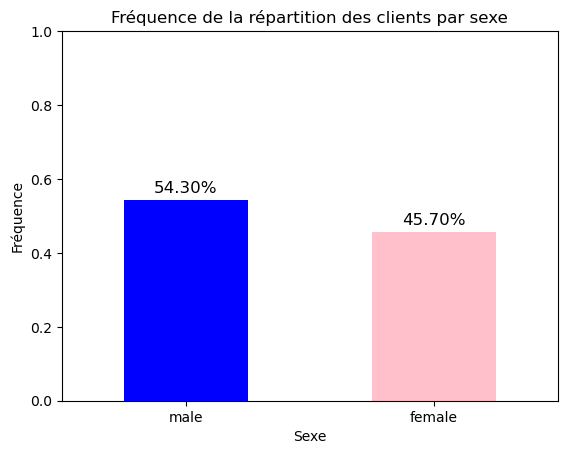

In [12]:
# Calcul des fréquences
freq = df['Sex'].value_counts(normalize=True)  # Fréquences en proportions (0-1)

# Création de diagramme en barres
ax = freq.plot(kind='bar', color=['blue', 'pink'])

# Ajout des annotations (valeurs de fréquence)
for i, v in enumerate(freq):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', fontsize=12)  # Convertir en %

# Personnalisation du graphique
plt.xlabel("Sexe")
plt.ylabel("Fréquence")
plt.title("Fréquence de la répartition des clients par sexe")
plt.ylim(0, 1)  # Laisser de la place pour les annotations
plt.xticks(rotation=0)  # Labels bien alignés

# Affichage du graphique
plt.show()

La proportion d'hommes visitant le supermarché (54,30 %) est plus élevée que celle des femmes (45,70 %). Ainsi, les hommes sont plus nombreux que les femmes à fréquenter le supermarché.

***

The proportion of men visiting the supermarket (54.30%) is higher than that of women (45.70%). This means that more men than women visit the supermarket.

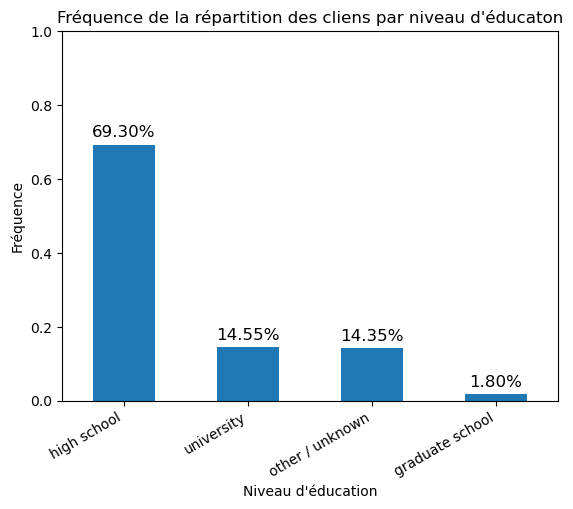

In [13]:
# Calcul des fréquences
freq = df['Education'].value_counts(normalize=True)  # Fréquences en proportions (0-1)

# Création de diagramme en barres
ax = freq.plot(kind='bar') #color=['gray', 'orange', 'blue', 'green'])

# Ajout des annotations (valeurs de fréquence)
for i, v in enumerate(freq):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', fontsize=12)  # Convertir en %

# Personnalisation du graphique
plt.xlabel("Niveau d'éducation")
plt.ylabel("Fréquence")
plt.title("Fréquence de la répartition des cliens par niveau d'éducaton")
plt.ylim(0, 1)  # Ajustement de l'échelle
plt.xticks(rotation=30, ha='right')  # Labels inclinés pour lisibilité

# Affichage du graphique
plt.show()


Nous constatons que 69,3 % des clients ont fait des études secondaires (high school), 14,55 % ont suivi une formation universitaire (university), 14,35 % appartiennent à la catégorie 'autres/inconnu' (other/unknown) et seulement 1,80 % ont fait des études de troisième cycle (graduate school). Ces résultats suggèrent que la majorité de la clientète du supermarché ont un niveau d'éducation intermédiaire.

****
We find that 69.3% of customers have a high school education, 14.55% have a university education, 14.35% fall into the 'other/unknown' category, and only 1.80% have a graduate school education. These results suggest that the majority of supermarket customers have an intermediate level of education.

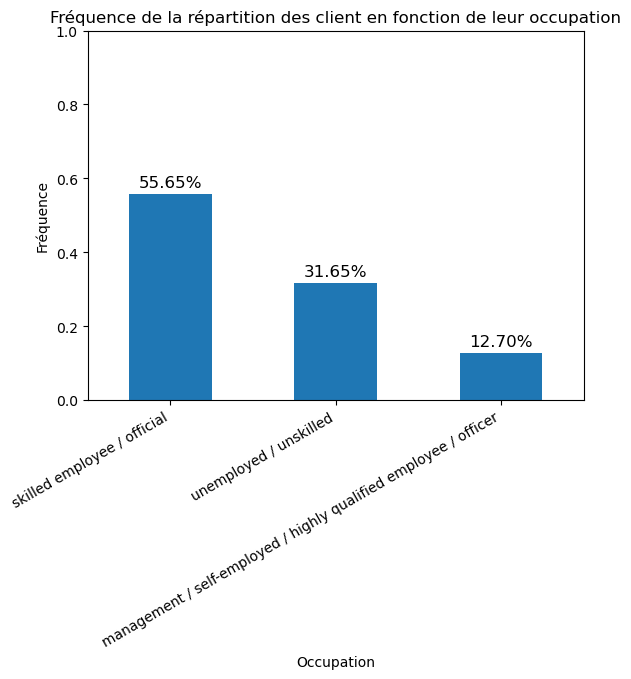

In [14]:
# Calcul des fréquences
freq = df['Occupation'].value_counts(normalize=True)  # Fréquences en proportions (0-1)

# Création de diagramme en barres
ax = freq.plot(kind='bar') #color=['lightgray', 'lightblue', 'lightgreen'])

# Ajout des annotations (valeurs de fréquence)
for i, v in enumerate(freq):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', fontsize=12)  # Convertir en %

# Personnalisation du graphique
plt.xlabel("Occupation")
plt.ylabel("Fréquence")
plt.title("Fréquence de la répartition des client en fonction de leur occupation")
plt.ylim(0, 1)  # Ajustement de l'échelle
plt.xticks(rotation=30, ha='right')  # Incliner les labels pour meilleure lisibilité

# Affichage du graphique
plt.show()

Nous constatons que la majorité des clients (55,65 %) sont des employés qualifiés ou des fonctionnaires (skilled empoyee/offical), tandis que 31,65 % sont sans emploi ou peu qualifiés (unemployed/unskilled). Une plus petite proportion (12,70 %) occupe des postes de management ou travailleuse indépendante ou hautement qualifiée (management / self-employed / highly qualified employee / officer). Cela signifie que le supermarché est principalement fréquenté par une population active aux qualifications intermédiaires.

***
We find that the majority of customers (55.65%) are skilled empoyee/offical, while 31.65% are unemployed/unskilled. A smaller proportion (12.70%) are management / self-employed / highly qualified employee / officer. This means that the supermarket is mainly frequented by a working population with intermediate qualifications.

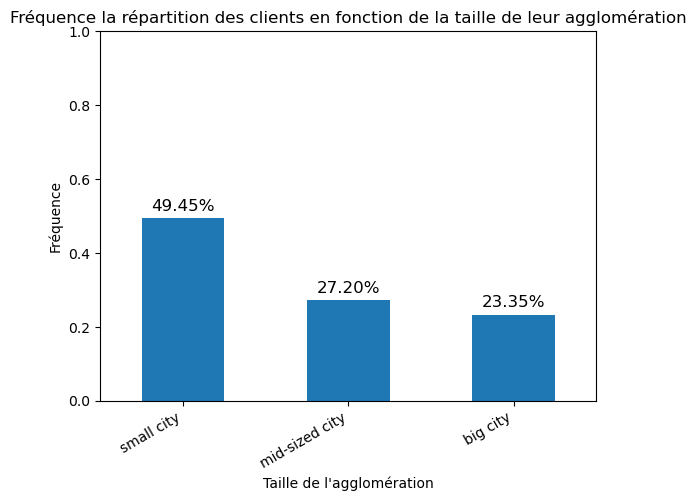

In [15]:
# Calcul des fréquences
freq = df['Settlement size'].value_counts(normalize=True)  # Fréquences en proportions (0-1)

# Création de diagramme en barres
ax = freq.plot(kind='bar') #color=['lightcoral', 'lightskyblue', 'lightgreen'])

# Ajout des annotations (valeurs de fréquence)
for i, v in enumerate(freq):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', fontsize=12)  # Convertir en %

# Personnalisation du graphique
plt.xlabel("Taille de l'agglomération")
plt.ylabel("Fréquence")
plt.title("Fréquence la répartition des clients en fonction de la taille de leur agglomération")
plt.ylim(0, 1)  # Ajustement de l'échelle
plt.xticks(rotation=30, ha='right')  # Incliner les labels pour meilleure lisibilité

# Affichage du graphique
plt.show()


Nous pouvons dire que près de la moitié des clients (49,45 %) résident dans une petite ville (small city), tandis que 27,20 % vivent dans une ville de taille moyenne (mid-sized city) et 23,35 % dans une grande ville (big city). Cela indique que le supermarché attire principalement une clientèle provenant de petites agglomérations. Cette répartition peut refléter l’implantation géographique du magasin ou les habitudes d’achat des résidents selon la taille de leur ville.

***
We can say that almost half the customers (49.45%) live in a small city, while 27.20% live in a mid-sized city and 23.35% in a big city. This indicates that the supermarket mainly attracts customers from small towns. This distribution may reflect the store's geographical location or the shopping habits of residents according to the size of their town.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


L'analyse des statistiques descriptives pour la variable 'Age' révèle plusieurs informations intéressantes. L'âge moyen est de 35,91 ans. L'écart-type de 11,72 ans indique une certaine variabilité des âges, ce qui signifie que la plupart des clients ont un âge situé dans une plage de 11,72 ans autour de la moyenne. L'âge minimum observé est de 18 ans, tandis que l'âge maximal est de 76 ans. En ce qui concerne la distribution, 25 % des individus ont un âge inférieur à 27 ans, 50 % des clients sont âgés de moins de 33 ans (ce qui correspond à la médiane), et 75 % des clients ont un âge inférieur à 42 ans. 

L'analyse des statistiques descriptives pour la variable 'Income' qui est le revenu annuel en dollars américains révèle plusieurs informations clés. Le revenu annuel moyen est de 120 954,42 dollars. L'écart-type est de 38 108,82 dollars, ce qui indique une large dispersion des revenus autour de la moyenne. Le revenu minimum observé est de 35 832 dollars, tandis que le revenu maximal atteint 309 364 dollars. En termes de distribution, 25 % des clients ont un revenu inférieur à 97 663,25 dollars, 50 % des clients gagnent moins de 115 548,50 dollars (ce qui correspond à la médiane), et 75 % des clients ont un revenu inférieur à 138 072,25 dollars. 

En conclusion, les clients du supermarché sont principalement des adultes jeunes et d'âge moyen, avec un revenu annuel relativement élevé. La majorité des clients ont un âge compris entre 27 et 42 ans, ce qui pourrait indiquer une clientèle stable et active dans sa carrière professionnelle. En termes de revenu, la majorité des clients gagnent entre 97 663 et 138 072 dollars par an, ce qui suggère que le supermarché attire une clientèle plutôt bien rémunérée, probablement composée de professionnels qualifiés ou d’employés dans des postes bien rémunérés. Cette combinaison d'âge et de revenu pourrait refléter une population à la recherche de produits de qualité tout en étant consciente de son pouvoir d'achat.

***

Analysis of the descriptive statistics for the 'Age' variable reveals several interesting facts. The average age is 35.91 years. The standard deviation of 11.72 years indicates some age variability, meaning that most customers are within 11.72 years of the mean. The minimum age observed is 18 years, while the maximum is 76 years. In terms of distribution, 25% of individuals are under 27, 50% of customers are under 33 (corresponding to the median), and 75% of customers are under 42 years.

Analysis of the descriptive statistics for the 'Income' variable, which is annual income in US dollars, reveals several key pieces of information. The average annual income is 120 954.42 dollars. The standard deviation is 38,108.82 dollars, indicating a wide dispersion of income around the mean. The minimum income observed is 35 832 dollars , while the maximum income reaches 309,364 dollars. In terms of distribution, 25% of customers earn less than 97 663.25, 50% of customers earn less than 115 548.50 dollars (corresponding to the median), and 75% of customers earn less than $138 072.25.

In conclusion, the supermarket's customers are mainly young, middle-aged adults with relatively high annual incomes. The majority of customers are between 27 and 42 years of age, which could indicate a stable clientele active in their professional careers. In terms of income, the majority of customers earn between $97 663 and 138 072 dollars a year, suggesting that the supermarket attracts a fairly well-paid clientele, probably made up of qualified professionals or employees in well-paid positions. This combination of age and income could reflect a population looking for quality products while being conscious of its purchasing power.


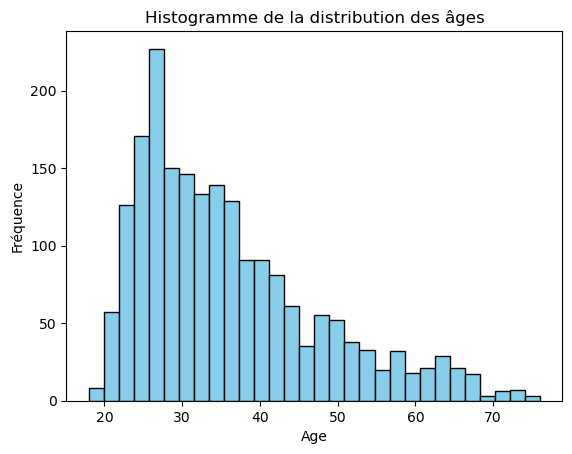

In [17]:
# Création de l'histogramme pour la colonne 'Age'
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')

# Ajout des labels
plt.xlabel("Age")
plt.ylabel("Fréquence")
plt.title("Histogramme de la distribution des âges")

# Affichage
plt.show()

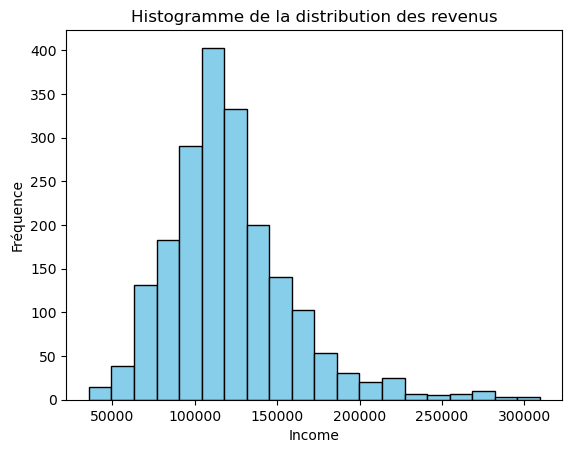

In [18]:
# Création de l'histogramme pour la colonne 'Income'
plt.hist(df['Income'], bins=20, color='skyblue', edgecolor='black')

# Ajout des labels
plt.xlabel("Income")
plt.ylabel("Fréquence")
plt.title("Histogramme de la distribution des revenus")

# Affichage
plt.show()

Analyses bivariées

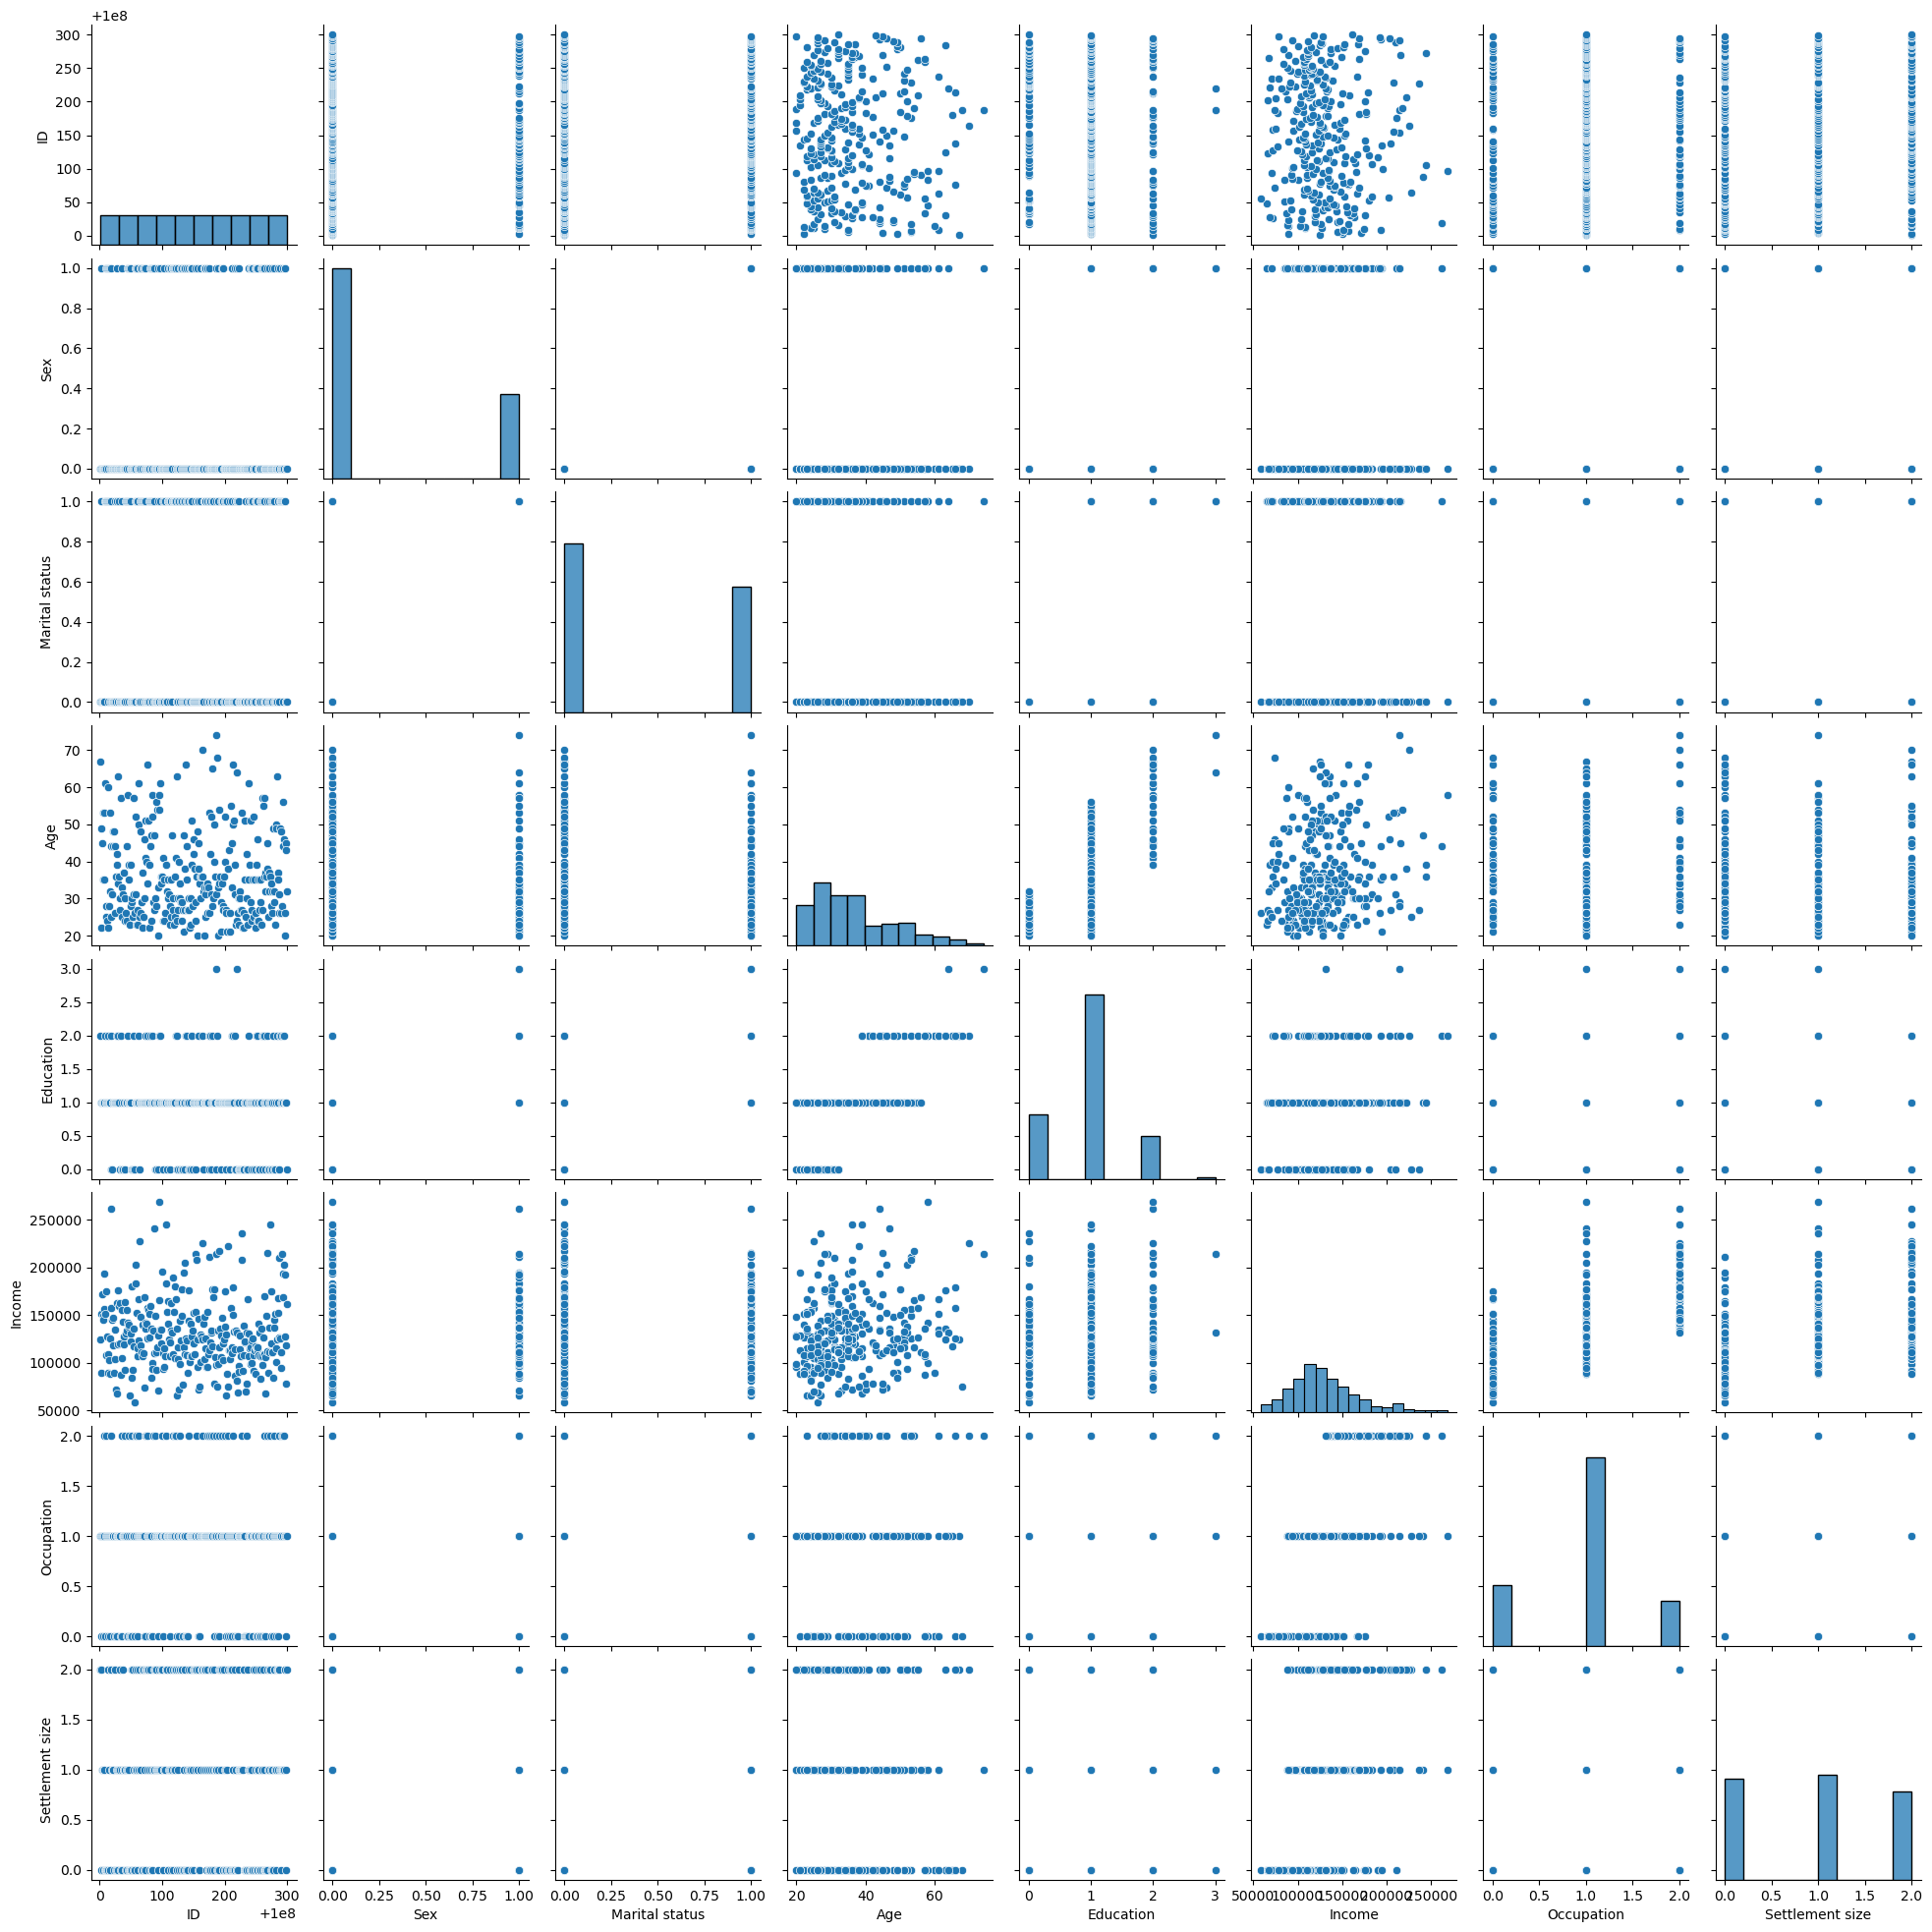

In [19]:
sns.pairplot(data.head(300))

# Modélisation des données

Normalisation des données

In [20]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [21]:
df1 = data[['Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size']]

In [22]:
df1.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [23]:
df1.shape

(2000, 7)

In [24]:
df1.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1Scale = scaler.fit_transform(df1)

In [26]:
print(df1Scale)

[[-0.91739884 -0.99302433  2.65361447 ...  0.09752361  0.29682303
   1.552326  ]
 [ 1.09003844  1.00702467 -1.18713209 ...  0.78265438  0.29682303
   1.552326  ]
 [-0.91739884 -0.99302433  1.11731585 ... -0.83320224 -1.26952539
  -0.90972951]
 ...
 [-0.91739884 -0.99302433 -0.41898277 ... -0.90695688 -1.26952539
  -0.90972951]
 [ 1.09003844  1.00702467 -1.01643224 ... -0.60332923 -1.26952539
  -0.90972951]
 [-0.91739884 -0.99302433 -0.93108232 ... -1.3789866  -1.26952539
  -0.90972951]]


In [27]:
np.nan in df1Scale

False

Détermination des clusters avec les Kmeans

In [28]:
from sklearn.cluster import KMeans
from tqdm import tqdm

In [29]:
# Choix du nombre optimal de clusters (méthode du coude)
inertia = []
K = range(1, 11)
for k in tqdm(K):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df1)
    inertia.append(model.inertia_)

100%|██████████| 10/10 [00:00<00:00, 12.31it/s]


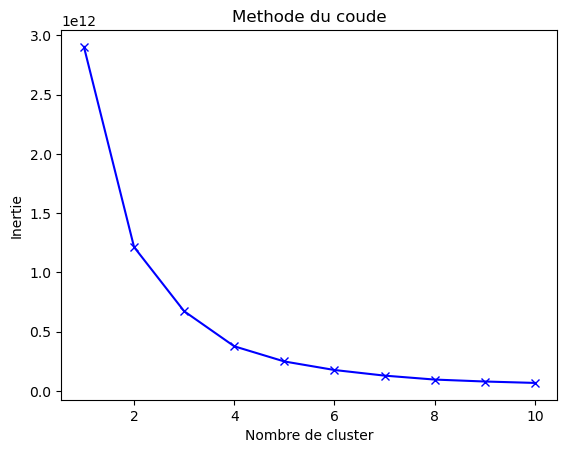

In [30]:
# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de cluster')
plt.ylabel('Inertie')
plt.title('Methode du coude')
plt.show()

In [31]:
# Appliquer KMeans avec le nombre de clusters optimal trouvé (supposons que c'est 6 pour ce cas)
model = KMeans(n_clusters=6, random_state=42)
model.fit(df1)

KMeans(n_clusters=6, random_state=42)

In [32]:
y = model.predict(df1)
y

array([0, 3, 4, ..., 2, 4, 2])

In [33]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [34]:
# Trouver les clusters uniques
unique_clusters, counts = np.unique(y, return_counts=True)

# Afficher le nombre d'individus par cluster
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} clients")

Cluster 0: 574 clients
Cluster 1: 95 clients
Cluster 2: 327 clients
Cluster 3: 316 clients
Cluster 4: 657 clients
Cluster 5: 31 clients


In [35]:
centroids = model.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns=df1.columns)
df_centroids

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.426087,0.462609,37.702609,1.092174,126967.290435,0.913043,0.899130
1,0.294737,0.410526,43.610526,1.294737,202032.168421,1.673684,1.389474
2,0.550769,0.486154,32.520000,0.876923,72540.261538,0.003077,0.021538
3,0.268987,0.449367,40.911392,1.189873,158252.310127,1.322785,1.272152
4,0.560790,0.572948,32.010638,0.942249,103073.618541,0.700608,0.562310
5,0.258065,0.354839,46.322581,1.419355,267865.612903,1.838710,1.612903


Nous avons segmenté nos clients en six groupes distincts :
- Jeunes actifs : Majoritairement des hommes, célibataires ou en couple, avec un revenu moyen, résidant principalement dans des villes de taille moyenne. (Cluster 0)
- Cadres supérieurs et entrepreneurs : Plutôt masculins et plus âgés, vivant en moyenne ou grande ville, avec un revenu élevé. (Cluster 1)
- Jeunes femmes peu ou pas qualifiées : Principalement célibataires ou en couple, avec un revenu faible, vivant en petite ville. (Cluster 2)
- Professionnels bien rémunérés : Majoritairement des hommes, indépendants ou managers, célibataires ou non, résidant en moyenne ou grande ville. (Cluster 3)
- Jeunes femmes employées qualifiées : Essentiellement non célibataires, avec un revenu intermédiaire, vivant en ville moyenne ou petite. (Cluster 4)
- Clients les plus aisés : Principalement des hommes célibataires, cadres supérieurs ou entrepreneurs, vivant en grande ville. (Cluster 5)

*** 
We have segmented our customers into six distinct groups:
- Young professionals: Mostly men, single or in couples, with average incomes, living mainly in medium-sized towns. (Cluster 0)
- Executives and entrepreneurs: Predominantly male and older, living in medium to large cities, with high incomes (Cluster 1).
- Young women with few or no qualifications: Mostly single or in couples, with low incomes, living in small towns (Cluster 2).
- Well-paid professionals: Mostly men, self-employed or managers, single or not, living in medium or large towns (Cluster 3).
- Qualified young female employees: Mostly non-single, middle-income, living in medium or small towns (Cluster 4).
- More affluent customers: Mainly single men, senior executives or entrepreneurs, living in large cities (Cluster 5).

# Rapport de l'analyse

Rapport d'analyse des clients du supermarché

L'analyse des données clients du supermarché permet d'identifier des tendances, des comportements d'achat et des segments de clientèle distincts. En exploitant les informations issues des cartes de membre, nous avons pu dégager des corrélations clés entre différents attributs des clients, ainsi que des segments de consommateurs pertinents. Ce rapport présente les résultats principaux de cette analyse et propose des recommandations stratégiques pour optimiser les performances commerciales et améliorer l'expérience client.

1.	Résumé des Principales Observations
Voici les principales observations:
  - La fréquentation du supermarché est dominée par les hommes (54,3 %), et la majorité des clients sont des employés qualifiés ou des fonctionnaires (55,65 %).
  - Près de la moitié des clients résident dans une petite ville (49,45 %), ce qui suggère une implantation géographique adaptée à cette clientèle.
  - Les clients du supermarché sont principalement des adultes jeunes à d'âge moyen, avec un revenu annuel relativement élevé et une majorité ayant un niveau d'éducation intermédiaire.
  - Les analyses montrent des corrélations notables entre l'âge et l'éducation, ainsi qu'entre le revenu et la nature du travail, soulignant l'impact des facteurs socio-économiques sur le comportement d'achat.

2. Segmentation des clients
Nous avons identifiés six (6) groupes distincts à savoir:
   -  Jeunes actifs : Majoritairement des hommes, célibataires ou en couple, avec un revenu moyen, résidant principalement dans des villes de taille moyenne. (Cluster 0)
   -  Cadres supérieurs et entrepreneurs : Plutôt masculins et plus âgés, vivant en moyenne ou grande ville, avec un revenu élevé. (Cluster 1)
   -  Jeunes femmes peu ou pas qualifiées : Principalement célibataires ou en couple, avec un revenu faible, vivant en petite ville. (Cluster2)
   -  Professionnels bien rémunérés : Majoritairement des hommes, indépendants ou managers, célibataires ou non, résidant en moyenne ou grande ville. (Cluster 3)
   -  Jeunes femmes employées qualifiées : Essentiellement non célibataires, avec un revenu intermédiaire, vivant en ville moyenne ou petite.(Cluster 4)
   -  Clients les plus aisés : Principalement des hommes célibataires, cadres supérieurs ou entrepreneurs, vivant en grande ville. (Cluster 5)

3. Recommandations stratégiques
Sur la base des résultats obtenus, plusieurs actions stratégiques peuvent être mises en place pour améliorer l'efficacité commerciale du supermarché :
   - Campagnes marketing ciblées : Adapter les promotions et la communication selon chaque segment de clients identifié afin d’optimiser les ventes et d’améliorer l’expérience client. Voici les stratégies spécifiques à chaque groupe :
     
      . Pour le premier groupe (Jeunes actifs), il faut offrir des promotions sur des produits du quotidien (alimentation, articles ménagers), mettre en place un programme de fidélité avec des récompenses sur les achats fréquents et surtout cibler cette audience via des publicités sur les réseaux sociaux et des campagnes e-mailing.
     
      . Pour le deuxième groupe (Cadres supérieurs et entrepreneurs), il faut offrir des services VIP comme la livraison à domicile ou des événements privés, mettre en avant des produits premium et bio (épicerie fine, vins, produits importés) et proposer un programme de fidélité haut de gamme avec des offres exclusives.
     
      . Pour le troisième groupe (Jeunes femmes peu ou pas qualifiées), il faut mettre en avant des offres économiques et des packs avantageux, proposer des réductions et des promotions sur les produits essentiels et utiliser des campagnes sur les réseaux sociaux et des influenceurs locaux.
     
      . Pour le quatrième groupe (Professionnels bien rémunérés), il faut offrir des services pratiques comme le drive et le click-and-collect, proposer des produits de qualité adaptés aux familles actives et mettre en place des remises sur les achats en grande quantité.
     
      . Pour le cinquième groupe (Jeunes femmes employées qualifiées), il faut offrir des promotions sur les produits bien-être, bio et cosmétiques et cibler ce segment avec des campagnes digitales sur Instagram et Facebook.
     
      . Pour le sixième groupe (Clients les plus aisés), il faut offrir une expérience d’achat premium avec des services exclusifs, mettre en avant des produits de luxe et importés puis proposer des ventes privées et des événements VIP pour fidéliser cette clientèle.

  - Amélioration de l'accessibilité des paiements : Introduire des moyens de paiement mobiles et faciliter les transactions pour les segments technophiles.
  - Optimisation de l'implantation des magasins : Élargir l'implantation dans les zones de forte concentration de clients identifiés.
  - Stratégie de pricing dynamique : Ajuster les prix et les offres promotionnelles en fonction du pouvoir d'achat des clients.


L'analyse des clients du supermarché a permis de dégager des tendances claires liées au profil démographique, aux habitudes de consommation et aux segments de marché les plus pertinents. La segmentation client met en lumière des groupes distincts dont les attentes et comportements peuvent orienter les stratégies marketing et commerciales. En mettant en place des actions adaptées à ces groupes, le supermarché pourra maximiser son chiffre d'affaires, améliorer l'expérience client et renforcer sa position concurrentielle.
   





Supermarket customer analysis report

By analyzing supermarket customer data, we were able to identify trends, purchasing behaviors and distinct customer segments. By exploiting information from membership cards, we were able to identify key correlations between different customer attributes, as well as relevant consumer segments. This report presents the key findings of this analysis, and offers strategic recommendations for optimizing sales performance and enhancing the customer experience.

1.	Summary of Main Observations
Here are the main observations:
  - Supermarket patronage is dominated by men (54.3%), and the majority of customers are skilled employees or civil servants (55.65%).
  - Nearly half of all customers live in a small town (49.45%), suggesting a geographical location suited to this clientele.
  - The supermarket's customers are mainly young to middle-aged adults, with relatively high annual incomes and a majority with an intermediate level of education.
  - Analyses show significant correlations between age and education, as well as between income and job type, underlining the impact of socio-economic factors on purchasing behavior.

2. Customer segmentation
We have segmented our customers into six distinct groups:
  - Young professionals: Mostly men, single or in couples, with average incomes, living mainly in medium-sized towns. (Cluster 0)
  - Executives and entrepreneurs: Predominantly male and older, living in medium to large cities, with high incomes (Cluster 1).
  - Young women with few or no qualifications: Mostly single or in couples, with low incomes, living in small towns (Cluster 2).
  - Well-paid professionals: Mostly men, self-employed or managers, single or not, living in medium or large towns (Cluster 3).
  - Qualified young female employees: Mostly non-single, middle-income, living in medium or small towns (Cluster 4).
  - More affluent customers: Mainly single men, senior executives or entrepreneurs, living in large cities (Cluster 5).

3. Strategic recommendations
Based on the results obtained, several strategic actions can be implemented to improve the supermarket's commercial efficiency:
   - Targeted marketing campaigns: Tailor promotions and communication to each identified customer segment to optimize sales and enhance the customer experience. Here are the specific strategies for each group :
     
      . For the first group (Young professionals), we need to offer promotions on everyday products (food, household items), set up a loyalty program with rewards for frequent purchases, and above all target this audience via advertising on social networks and e-mail campaigns.
     
      . For the second group (Executives and entrepreneurs), we need to offer VIP services such as home delivery or private events, highlight premium and organic products (delicatessen, wines, imported products) and propose a high-end loyalty program with exclusive offers.

      . For the third group (Young women with few or no qualifications), we need to highlight low-cost offers and advantageous packages, offer discounts and promotions on essential products, and use campaigns on social networks and local influencers.
     
      . For the fourth group (Well-paid professionals), we need to offer practical services such as drive-through and click-and-collect, propose quality products suited to working families and implement discounts on bulk purchases.
     
      . For the fifth group (Qualified Young Female Employees), offer promotions on wellness, organic and cosmetic products, and target this segment with digital campaigns on Instagram and Facebook.

     . For the sixth group (Most affluent customers), we need to offer a premium shopping experience with exclusive services, highlight luxury and imported products, and offer private sales and VIP events to retain this clientele.

  - Improve payment accessibility: Introduce mobile payment methods and facilitate transactions for technophile segments.
  - Optimize store locations: Expand locations in areas with a high concentration of identified customers.
  - Dynamic pricing strategy: Adjust prices and promotional offers according to customers' purchasing power.


Analysis of the supermarket's customers has revealed clear trends in demographic profile, consumption habits and the most relevant market segments. Customer segmentation highlights distinct groups whose expectations and behaviors can guide marketing and sales strategies. By implementing actions tailored to these groups, the supermarket can maximize sales, enhance the customer experience and strengthen its competitive position.
     
